In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# read the dataset
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

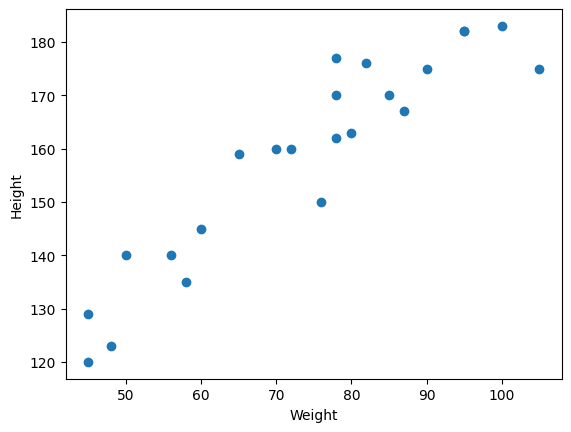

In [7]:
### Always we need to check how our Input features and output features are correlated
### above we can do using scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [8]:
### Find correlation between Weight and height
df.corr()  # this method is using pearson : standard correlation coefficient

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


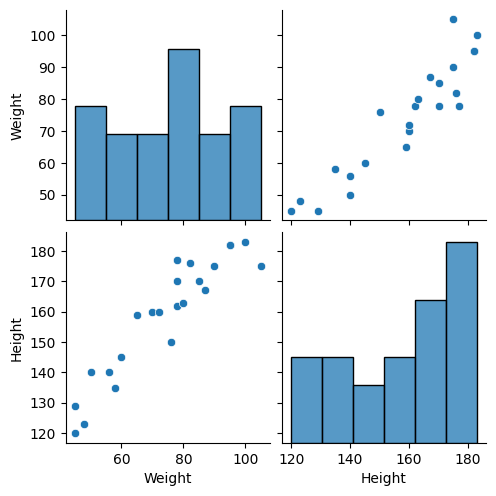

In [13]:
### Using seaborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [14]:
### We can see features are linearly correlated, so linear regression will work

In [24]:
## Independent and Dependent Features
X_series = df['Weight']
X_series

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
16     50
17     65
18     76
19     87
20     45
21     56
22     72
Name: Weight, dtype: int64

In [25]:
type(X_series) ## Its a series

pandas.core.series.Series

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
## Independent and Dependent Features
X = df[['Weight']]  ## Our Independent Feature Always should be in Dataframe or 2 Dimensional array
X
## 2 Dimensional Array
np.array(X).shape


(23, 1)

In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
y = df['Height'] # It can be series because only one output column or 1 D array
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [31]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
X_train.shape

(17, 1)

In [33]:
## Standardization
## x --> weight is in kg, y --> height is in cm
## Apply Z score to all Independent Features
## Zscore will convert all Input features to with mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler


In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [36]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [37]:
X_test = scaler.transform(X_test)

In [38]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [39]:
### Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [40]:
regression = LinearRegression()

In [41]:
regression.fit(X_series, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 45  58  48  60  70  78  80  90  95  78  82  95 105 100  85  78  50  65
  76  87  45  56  72].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
## Any algorithm Input should be 2D array

In [43]:
regression.fit(X_train, y_train)

LinearRegression()

In [45]:
regression.coef_ # It is the slope, Its onlt one because we have only Independent Features
## 1 moment in x value, it leads to 17.29 movement in y value

array([17.2982057])

In [47]:
regression.intercept_ # Its the Intercept Value
# When Weight value is zero, where our best fit line crosses y-axis

156.47058823529412

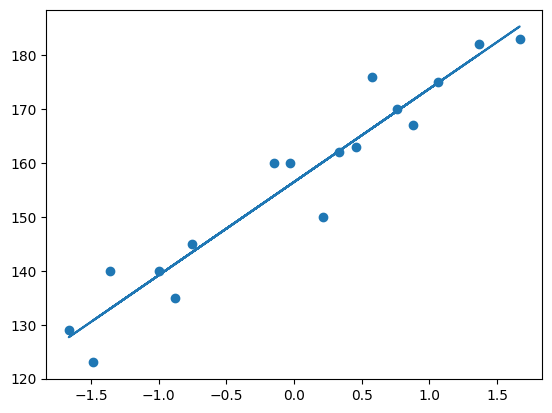

In [49]:
## Plot Training data Best Fit Line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [50]:
### Do the Prediction for Test Data
y_pred = regression.predict(X_test)

In [51]:
### Prediction on Test Data
# predicted height output =  intercept + coef(Weights)
# y_pred_test = 156.470 + 17.29(X_test)

In [52]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [54]:
## R Square
from sklearn.metrics import r2_score

In [55]:
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


In [56]:
## Adjusted R Square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [59]:
## OLS Linear Regression
import statsmodels.api as sm

In [60]:
## OLS Linear Regression
model = sm.OLS(y_train, X_train).fit()

In [61]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 06 Apr 2024   Prob (F-statistic):                       0.664
Time:                        21:05:41   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/rajesh/anaconda3/envs/ml/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [63]:
## With OLS also we are getting same Coefficient = 17.29

In [64]:
## Prediction for the new data
regression.predict([[72]])

array([1401.94139895])

In [65]:
## Why We got such a big values, because our new values is not Standardized


In [66]:
regression.predict(scaler.transform([[72]]))

/Users/rajesh/anaconda3/envs/ml/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [67]:
## Now we got correct